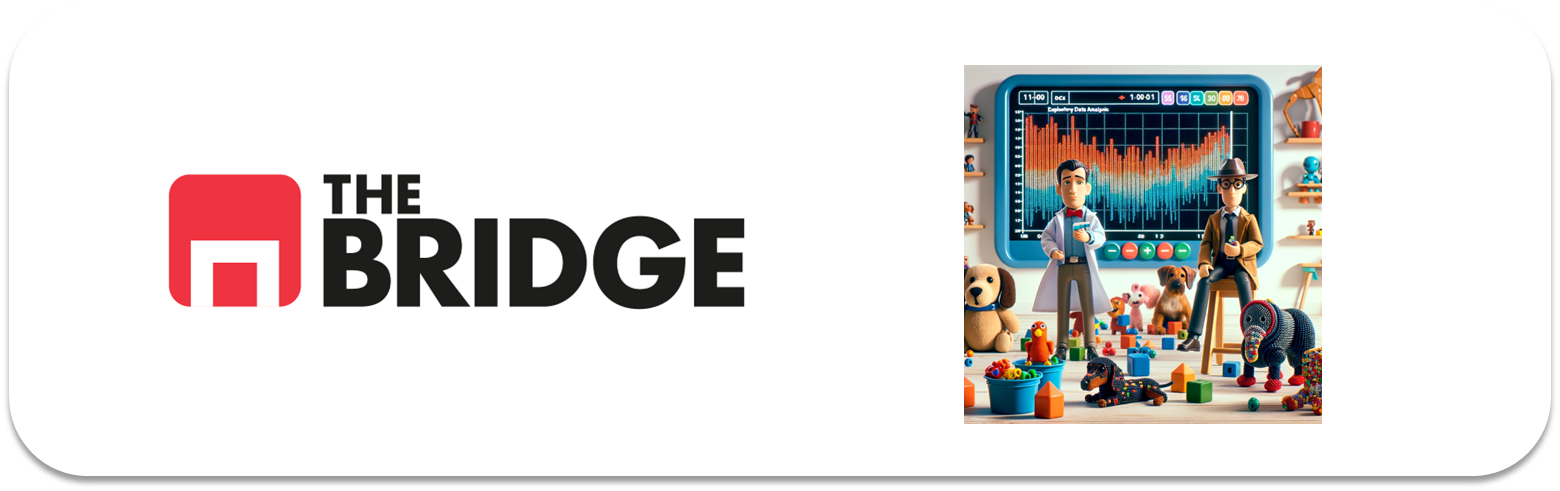

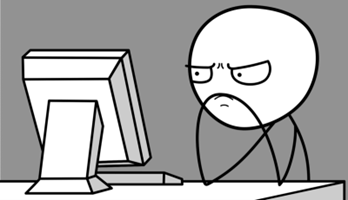

Para ejercitarte y afianzar lo aprendido sobre el análisis bivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [5]:
df = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\ejercicios\admission_data (1).csv")
df

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected
...,...,...,...,...,...
12758,12758,1973,Other,M,Accepted
12759,12759,1973,Department of Mechanical Engineering,M,Accepted
12760,12760,1973,Other,F,Rejected
12761,12761,1973,Other,M,Rejected


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB


In [11]:
df = df.drop("Unnamed: 0", axis= 1)
df

,Year,Major,Gender,Admission
0,1973,School of Medicine,F,Rejected
1,1973,Department of Economics,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,Department of Mechanical Engineering,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       12763 non-null  int64 
 1   Major      12763 non-null  object
 2   Gender     12763 non-null  object
 3   Admission  12763 non-null  object
dtypes: int64(1), object(3)
memory usage: 399.0+ KB


### Ejercicio 2

Haz el análisis bivariante de "Admission" y "Major" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio) y contesta a las siguientes preguntas:
* ¿Cuál es el departamento con el mayor porcentaje de admsiones?¿Y el de menor?
* ¿Existe alguna diferencia destacada entre los departamentos?

In [14]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

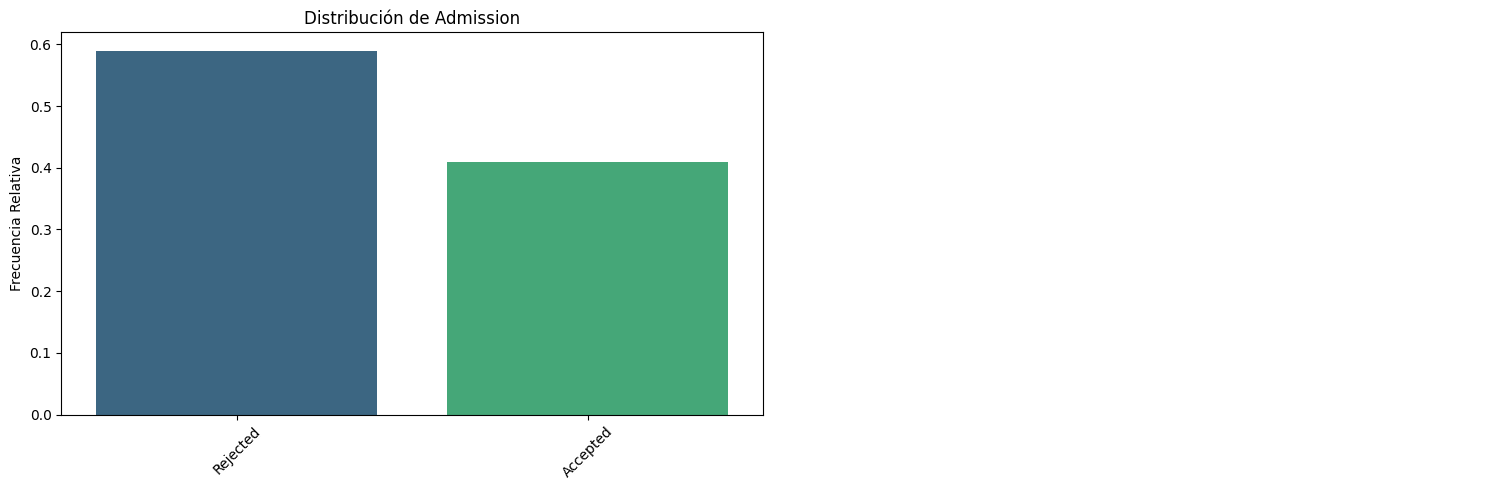

In [15]:
pinta_distribucion_categoricas(df, ["Admission"], relativa=True)

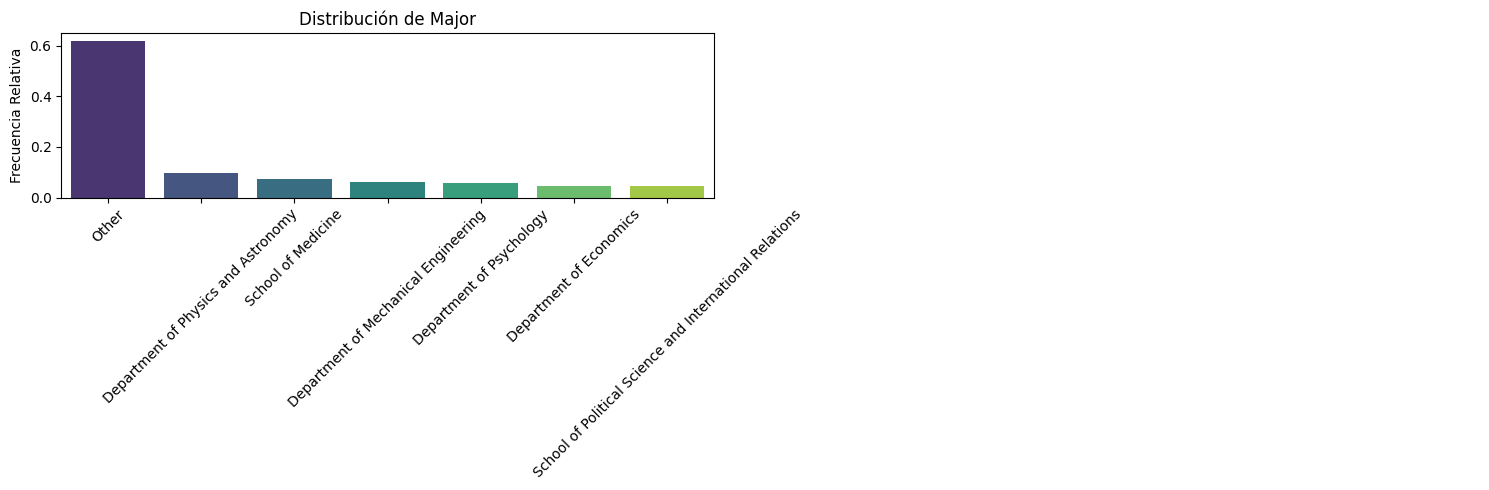

In [16]:
pinta_distribucion_categoricas(df, ["Major"], relativa=True)

In [18]:
def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

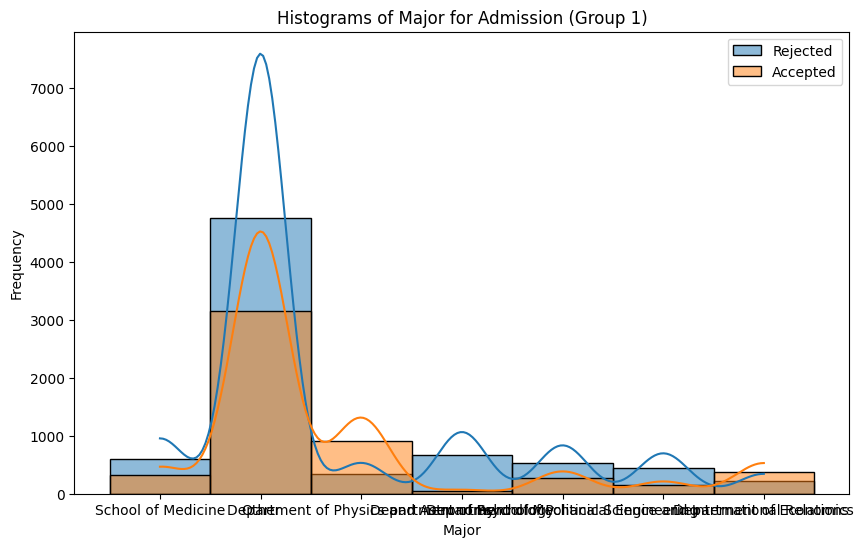

In [19]:
plot_grouped_histograms(df, "Admission", "Major", 2)

El que más adimisiones tiene el el Department of Physics, y es en el que más aceptan con diferencia en relación a los otros. Igual habría que mirar si el número de vacantes en ese departamneto es mayor que en el resto. 

### Ejercicio 3

Repite el análisis para "Admission" y "Gender" y responde a las siguientes preguntas:
* ¿Existe una diferencia visual significativa entre el porcentaje de admitidos de cada género?
* ¿Cuál de los dos grupos tiene más admisiones?

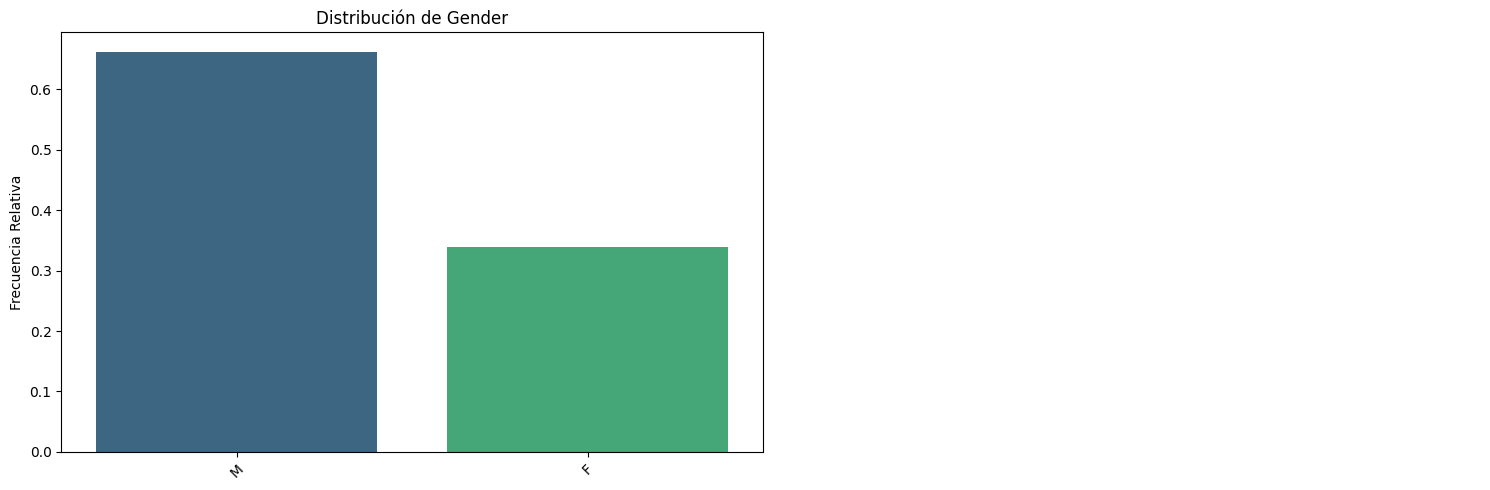

In [21]:
pinta_distribucion_categoricas(df, ["Gender"], relativa=True)

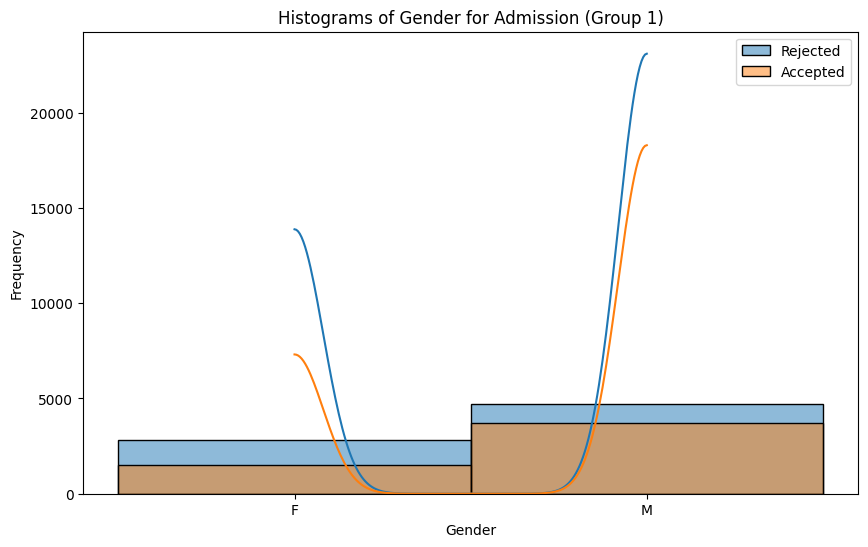

In [20]:
plot_grouped_histograms(df, "Admission", "Gender", 2)

En general, más hombres se presentan independientemente de que sean aceptados o no, y de estos una mayoria son rechazados(?). 

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [22]:
df_tips = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\ejercicios\tips (1).csv")
df_tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [24]:
df_tips = df_tips.drop("Unnamed: 0", axis= 1)
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Ejercicio 5

Haz el análisis bivariante de "tip" y "sex" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio), añade el cálculo de la media y mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguientes preguntas:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "sex"?
* ¿Son diferentes respecto al  conjunto total?

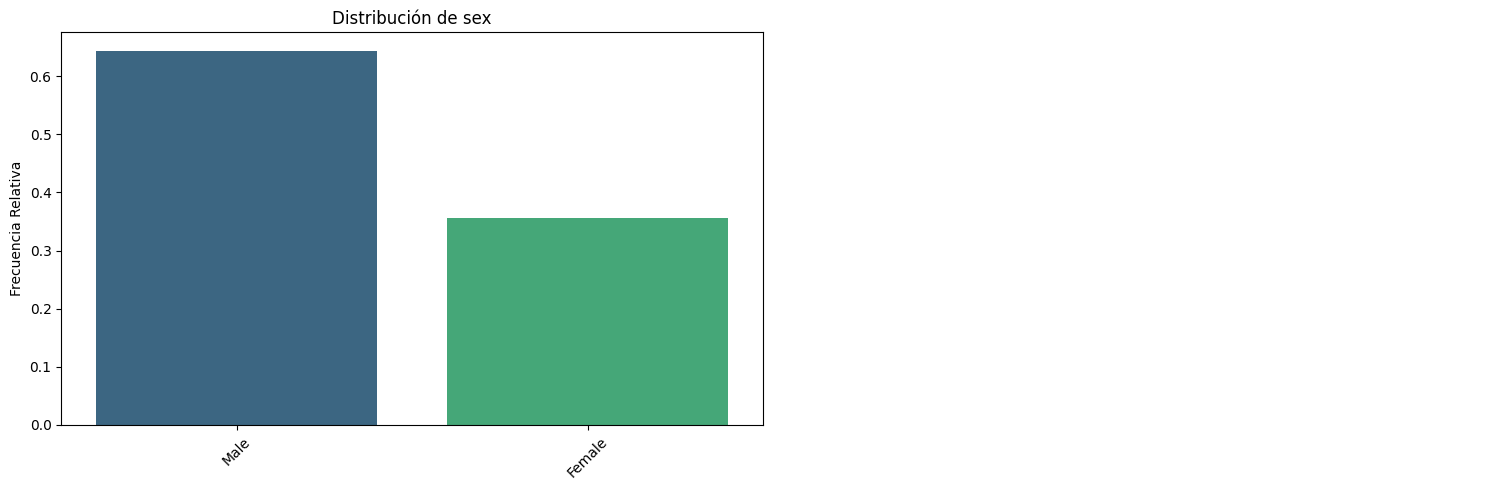

In [27]:
pinta_distribucion_categoricas(df_tips, ["sex"], relativa=True)

In [29]:
def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()


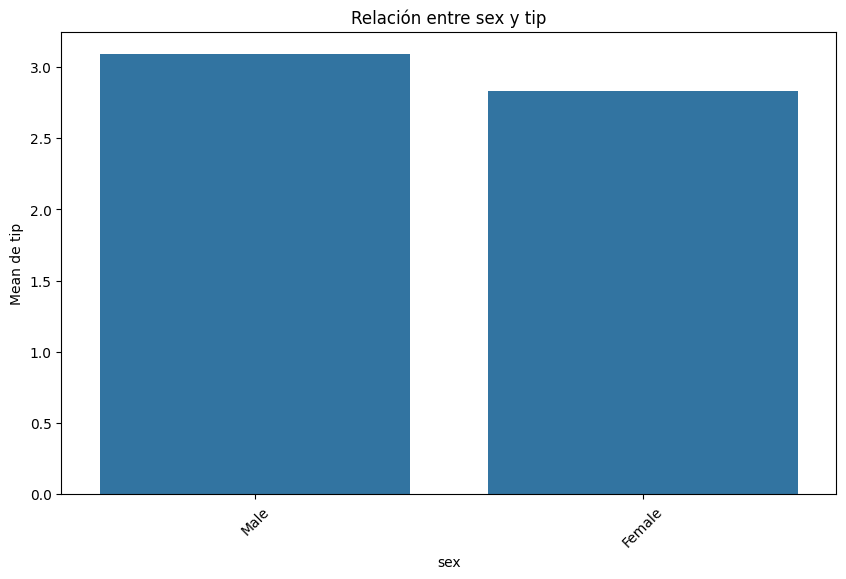

In [32]:
plot_categorical_numerical_relationship(df_tips, "sex", "tip", measure="mean")

de media los males dejan más propina? (muy poca diferencia)

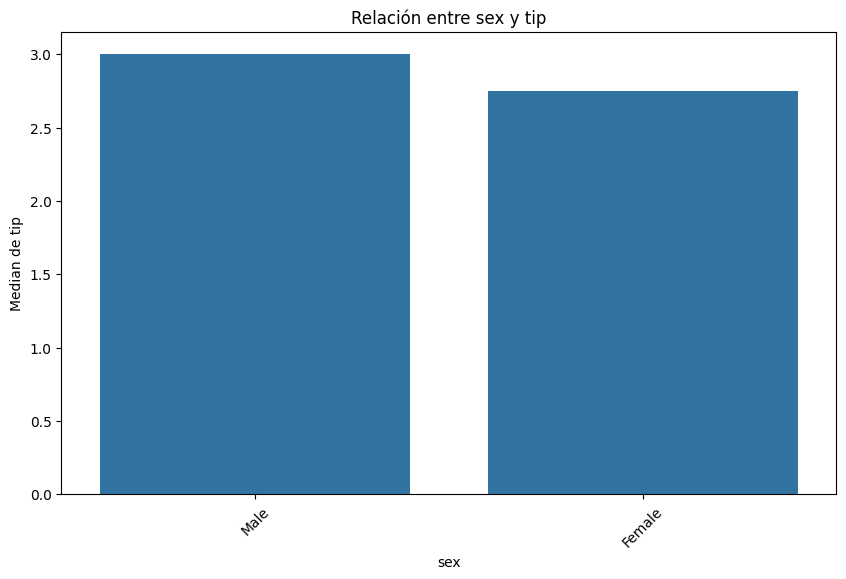

In [33]:
plot_categorical_numerical_relationship(df_tips, "sex", "tip", measure="median")

### Ejercicio 6

Repite el análisis pero esta vez para "tip" y "smoker", añade también el cálculo de la media y de la mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguiente pregunta:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "smoker"?

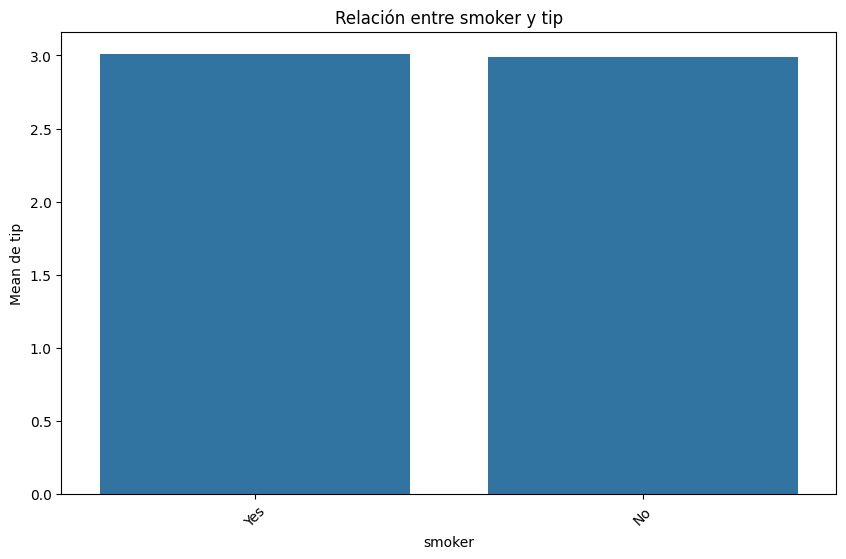

In [34]:
plot_categorical_numerical_relationship(df_tips, "smoker", "tip", measure="mean")

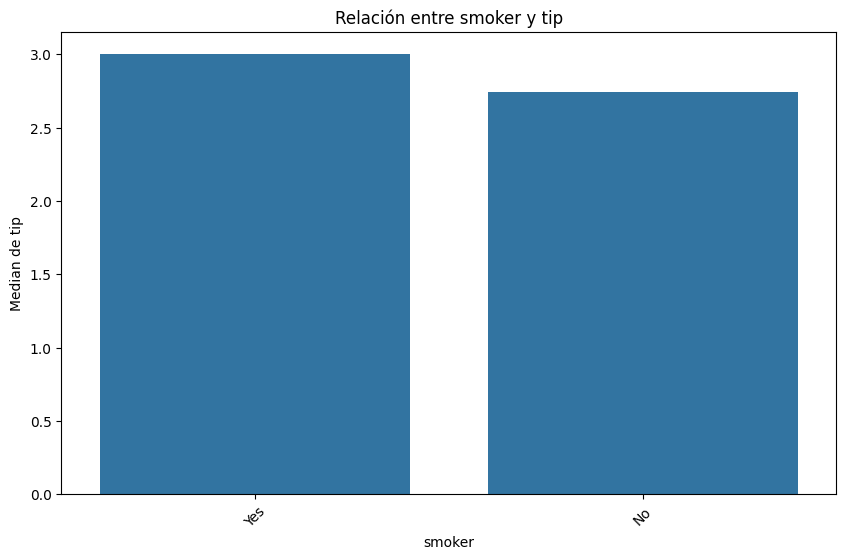

In [35]:
plot_categorical_numerical_relationship(df_tips, "smoker", "tip", measure="median")

los fumadores suelen dejar más propina

### Ejericicio 7

Carga ahora el datase de accidentes de coches, que se encuentra en la ruta "./data/car_crashes.csv" y deshazte de las columnas innecesarias

In [40]:
df_cars= pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\Sprint_07\unidad_2\ejercicios\car_crashes.csv")
df_cars

,|total|speeding|alcohol|not_distracted|no_previous|ins_premium|ins_losses|abbrev
0,0|18.8|7.332000000000001|5.64|18.048|15.04|784...
1,1|18.1|7.421|4.525|16.290000000000003|17.014|1...
2,2|18.6|6.51|5.208000000000001|15.624|17.856|89...
3,3|22.4|4.032|5.824|21.056|21.28|827.34|142.39|AR
4,4|12.0|4.2|3.36|10.92|10.68|878.41|165.63|CA
5,5|13.6|5.032|3.808|10.743999999999998|12.92|83...
6,6|10.8|4.968|3.888|9.396|8.856|1068.73|167.02|CT
7,7|16.2|6.156000000000001|4.86|14.094|16.038|11...
8,8|5.9|2.006|1.5930000000000002|5.9|5.9|1273.89...
9,9|17.9|3.759|5.190999999999999|16.468|16.826|1...


In [41]:
df_cars = df_cars.iloc[:, 0].str.split('|', expand=True)
df_cars

,0,1,2,3,4,5,6,7,8
0,0,18.8,7.332000000000001,5.64,18.048,15.04,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290000000000003,17.014,1053.48,133.93,AK
2,2,18.6,6.51,5.208000000000001,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.28,827.34,142.39,AR
4,4,12.0,4.2,3.36,10.92,10.68,878.41,165.63,CA
5,5,13.6,5.032,3.808,10.743999999999998,12.92,835.5,139.91,CO
6,6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,7,16.2,6.156000000000001,4.86,14.094,16.038,1137.87,151.48,DE
8,8,5.9,2.006,1.5930000000000002,5.9,5.9,1273.89,136.05,DC
9,9,17.9,3.759,5.190999999999999,16.468,16.826,1160.13,144.18,FL


In [44]:
df_cars.columns = ['index1','total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses', 'abbrev']
df_cars

,index1,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,0,18.8,7.332000000000001,5.64,18.048,15.04,784.55,145.08,AL
1,1,18.1,7.421,4.525,16.290000000000003,17.014,1053.48,133.93,AK
2,2,18.6,6.51,5.208000000000001,15.624,17.856,899.47,110.35,AZ
3,3,22.4,4.032,5.824,21.056,21.28,827.34,142.39,AR
4,4,12.0,4.2,3.36,10.92,10.68,878.41,165.63,CA
5,5,13.6,5.032,3.808,10.743999999999998,12.92,835.5,139.91,CO
6,6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,7,16.2,6.156000000000001,4.86,14.094,16.038,1137.87,151.48,DE
8,8,5.9,2.006,1.5930000000000002,5.9,5.9,1273.89,136.05,DC
9,9,17.9,3.759,5.190999999999999,16.468,16.826,1160.13,144.18,FL


In [46]:
df_cars = df_cars.drop("index1", axis= 1)
df_cars

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332000000000001,5.64,18.048,15.04,784.55,145.08,AL
1,18.1,7.421,4.525,16.290000000000003,17.014,1053.48,133.93,AK
2,18.6,6.51,5.208000000000001,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.28,827.34,142.39,AR
4,12.0,4.2,3.36,10.92,10.68,878.41,165.63,CA
5,13.6,5.032,3.808,10.743999999999998,12.92,835.5,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156000000000001,4.86,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.5930000000000002,5.9,5.9,1273.89,136.05,DC
9,17.9,3.759,5.190999999999999,16.468,16.826,1160.13,144.18,FL


### Ejercicio 8

Haz un analisis bivairante entre "total" y "speeding". Muestra su diagrama de dispersión y su valor de correlación de pearson obtenido con pandas. Luego contesta a la siguiente pregunta
* ¿Existe alguna relación visual entre las variables?¿Y numérica?

In [47]:
def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()


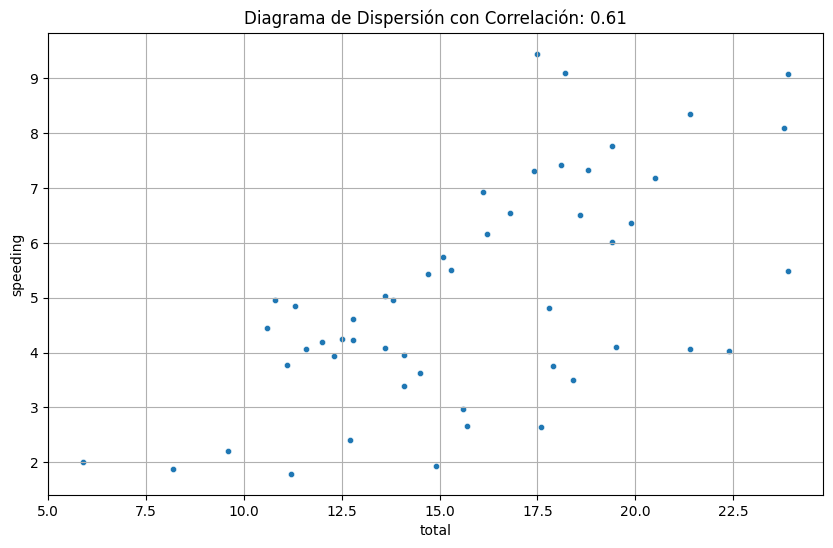

In [57]:
grafico_dispersion_con_correlacion(df_cars, "total", "speeding", 20, mostrar_correlacion=True)

### Ejercicio 9

Usa scipy tal como lo hicimos en el workout para hacer el test de correlación. ¿Cuál es el p-value?¿Qué podemos decir de la correlación lineal entre "total" y "speeding"?

In [53]:
df_cars.dtypes
df_cars["total"] = pd.to_numeric(df_cars["total"], errors="coerce")
df_cars["speeding"] = pd.to_numeric(df_cars["speeding"], errors="coerce")

In [56]:
from scipy.stats import pearsonr

pearsonr(df_cars["speeding"], df_cars["total"])

PearsonRResult(statistic=np.float64(0.6115476008001185), pvalue=np.float64(1.8670391109056865e-06))

es una correlacion postiva, a medida que aumenta la velocidad aumentan los accidentes. El p value es mucho menor que el nivel típico, por lo que es improbable que esta correlación ocurra por casualidad.